# Исследование надежности заемщиков

**Цель:**

- Определить влияет ли семейное положение и количество детей клиента на факт погашения кредита в срок. 

Входные данные от банка — статистика о платёжеспособности клиентов. Результаты исследования будут учтены при построении модели кредитного скоринга — специальной системы, которая оценивает способность потенциального заёмщика вернуть кредит банку.

## Откроем таблицу и изучим общую информацию о данных

Импортируем необходимые для работы библиотеки.

In [1]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import numpy as np

Считаем данные из csv-файла в датафрейм и сохраним в переменную data.

In [2]:
data = pd.read_csv('dataset/data.csv')

Выведем первые 20 строчек датафрейма data на экран.

In [3]:
data.head(20)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,-5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,-4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу
5,0,-926.185831,27,высшее,0,гражданский брак,1,M,компаньон,0,255763.565419,покупка жилья
6,0,-2879.202052,43,высшее,0,женат / замужем,0,F,компаньон,0,240525.971920,операции с жильем
7,0,-152.779569,50,СРЕДНЕЕ,1,женат / замужем,0,M,сотрудник,0,135823.934197,образование
8,2,-6929.865299,35,ВЫСШЕЕ,0,гражданский брак,1,F,сотрудник,0,95856.832424,на проведение свадьбы
9,0,-2188.756445,41,среднее,1,женат / замужем,0,M,сотрудник,0,144425.938277,покупка жилья для семьи


Выведем основную информацию о датафрейме с помощью метода info().

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      19351 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


## Предобработка данных

### Удаление пропусков

Выведем количество пропущенных значений для каждого столбца. Используем комбинацию двух методов.

In [5]:
data.isna().sum()

children               0
days_employed       2174
dob_years              0
education              0
education_id           0
family_status          0
family_status_id       0
gender                 0
income_type            0
debt                   0
total_income        2174
purpose                0
dtype: int64

В двух столбцах есть пропущенные значения. Один из них — days_employed. Пропуски в этом столбце мы обработаем позже. Другой столбец с пропущенными значениями — total_income — хранит данные о доходах. На сумму дохода сильнее всего влияет тип занятости, поэтому заполнить пропуски в этом столбце нужно медианным значением по каждому типу из столбца income_type. Например, у человека с типом занятости сотрудник пропуск в столбце total_income должен быть заполнен медианным доходом среди всех записей с тем же типом.

In [6]:
for t in data['income_type'].unique():
    data.loc[(data['income_type'] == t) & (data['total_income'].isna()), 'total_income'] = \
    data.loc[(data['income_type'] == t), 'total_income'].median()

### Обработка аномальных значений

В данных могут встречаться артефакты (аномалии) — значения, которые не отражают действительность и появились по какой-то ошибке. Таким артефактом будет отрицательное количество дней трудового стажа в столбце days_employed. Для реальных данных это нормально. Обработем значения в этом столбце: заменим все отрицательные значения положительными с помощью метода abs().

In [7]:
data['days_employed'] = data['days_employed'].abs()

Для каждого типа занятости выведем медианное значение трудового стажа days_employed в днях.

In [8]:
data.groupby('income_type')['days_employed'].median()

income_type
безработный        366413.652744
в декрете            3296.759962
госслужащий          2689.368353
компаньон            1547.382223
пенсионер          365213.306266
предприниматель       520.848083
сотрудник            1574.202821
студент               578.751554
Name: days_employed, dtype: float64

У двух типов (безработные и пенсионеры) получатся аномально большие значения. Исправить такие значения сложно, поэтому оставим их как есть.

Выведем перечень уникальных значений столбца children.

In [9]:
data['children'].unique()

array([ 1,  0,  3,  2, -1,  4, 20,  5], dtype=int64)

В столбце children есть два аномальных значения. Удалим строки, в которых встречаются такие аномальные значения из датафрейма data.

In [10]:
data.drop(data.loc[(data['children'] == -1) | (data['children'] == 20), 'children'].index, inplace = True)

Ещё раз выведем перечень уникальных значений столбца children, чтобы убедиться, что артефакты удалены.

In [11]:
data['children'].unique()

array([1, 0, 3, 2, 4, 5], dtype=int64)

### Удаление пропусков

Заполним пропуски в столбце days_employed медианными значениями по каждому типу занятости income_type.

In [12]:
data['days_employed'] = data['days_employed'].fillna(data.groupby('income_type')['days_employed'].transform('median'))

Убедимся, что все пропуски заполнены. Проверим себя и ещё раз выведем количество пропущенных значений для каждого столбца с помощью двух методов.

In [13]:
data.isna().sum()

children            0
days_employed       0
dob_years           0
education           0
education_id        0
family_status       0
family_status_id    0
gender              0
income_type         0
debt                0
total_income        0
purpose             0
dtype: int64

### Изменение типов данных

Заменим вещественный тип данных в столбце total_income на целочисленный с помощью метода astype().

In [14]:
data['total_income'] = data['total_income'].astype('int')

### Обработка дубликатов

Обработаем неявные дубликаты в столбце education. Приведем значения столбца к нижнему регистру.

In [15]:
data['education'] = data['education'].str.lower()

Выведем на экран количество строк-дубликатов в данных. Если такие строки присутствуют, удалим их.

In [16]:
data['education'].duplicated().sum()

21397

In [17]:
data = data.drop_duplicates()
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21331 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21331 non-null  int64  
 1   days_employed     21331 non-null  float64
 2   dob_years         21331 non-null  int64  
 3   education         21331 non-null  object 
 4   education_id      21331 non-null  int64  
 5   family_status     21331 non-null  object 
 6   family_status_id  21331 non-null  int64  
 7   gender            21331 non-null  object 
 8   income_type       21331 non-null  object 
 9   debt              21331 non-null  int64  
 10  total_income      21331 non-null  int32  
 11  purpose           21331 non-null  object 
dtypes: float64(1), int32(1), int64(5), object(5)
memory usage: 2.0+ MB


### Категоризация данных

На основании диапазонов, указанных ниже, создадим в датафрейме data столбец total_income_category с категориями:

    0–30000 — 'E';
    30001–50000 — 'D';
    50001–200000 — 'C';
    200001–1000000 — 'B';
    1000001 и выше — 'A'.

Используем для этого собственную функцию с именем categorize_income() и метод apply().

In [18]:
def categorize_income(income):
    if 0 <= income <= 30000:
        return 'E'
    elif 30001 <= income <= 50000:
        return 'D'
    elif 50001 <= income <= 200000:
        return 'C'
    elif 200001 <= income <= 1000000:
        return 'B'
    elif 1000001 <= income:
        return 'A'
    raise Exception('Доход не может быть отрицательным')

In [19]:
data['total_income_category'] = data['total_income'].apply(categorize_income)
data.head()

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,total_income_category
0,1,8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875,покупка жилья,B
1,1,4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080,приобретение автомобиля,C
2,0,5623.422610,33,среднее,1,женат / замужем,0,M,сотрудник,0,145885,покупка жилья,C
3,3,4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628,дополнительное образование,B
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616,сыграть свадьбу,C


Выведем на экран перечень уникальных целей взятия кредита из столбца purpose.

In [20]:
data['purpose'].unique()

array(['покупка жилья', 'приобретение автомобиля',
       'дополнительное образование', 'сыграть свадьбу',
       'операции с жильем', 'образование', 'на проведение свадьбы',
       'покупка жилья для семьи', 'покупка недвижимости',
       'покупка коммерческой недвижимости', 'покупка жилой недвижимости',
       'строительство собственной недвижимости', 'недвижимость',
       'строительство недвижимости', 'на покупку подержанного автомобиля',
       'на покупку своего автомобиля',
       'операции с коммерческой недвижимостью',
       'строительство жилой недвижимости', 'жилье',
       'операции со своей недвижимостью', 'автомобили',
       'заняться образованием', 'сделка с подержанным автомобилем',
       'получение образования', 'автомобиль', 'свадьба',
       'получение дополнительного образования', 'покупка своего жилья',
       'операции с недвижимостью', 'получение высшего образования',
       'свой автомобиль', 'сделка с автомобилем',
       'профильное образование', 'высшее об

Создадим функцию, которая на основании данных из столбца purpose сформирует новый столбец purpose_category, в который войдут следующие категории:

    'операции с автомобилем',
    'операции с недвижимостью',
    'проведение свадьбы',
    'получение образования'.

Например, если в столбце purpose находится подстрока 'на покупку автомобиля', то в столбце purpose_category должна появиться строка 'операции с автомобилем'.

Напишем собственную функцию с именем categorize_purpose() и метод apply(). Изучим данные в столбце purpose и определим, какие подстроки помогут нас правильно определить категорию.

In [21]:
def categorize_purpose(purpose):
    if "авто" in purpose:
        return 'операции с автомобилем'
    elif "недвиж" in purpose:
        return 'операции с недвижимостью'
    elif "жиль" in purpose:
        return 'операции с недвижимостью'
    elif "свадьб" in purpose:
        return 'проведение свадьбы'
    elif "образован" in purpose:
        return 'получение образования'
    raise Exception('Цель не подходит ни под одну категорию')  

In [22]:
data['purpose_category'] = data['purpose'].apply(categorize_purpose)

### Исследуем данные и ответим на вопросы

#### Есть ли зависимость между количеством детей и возвратом кредита в срок?

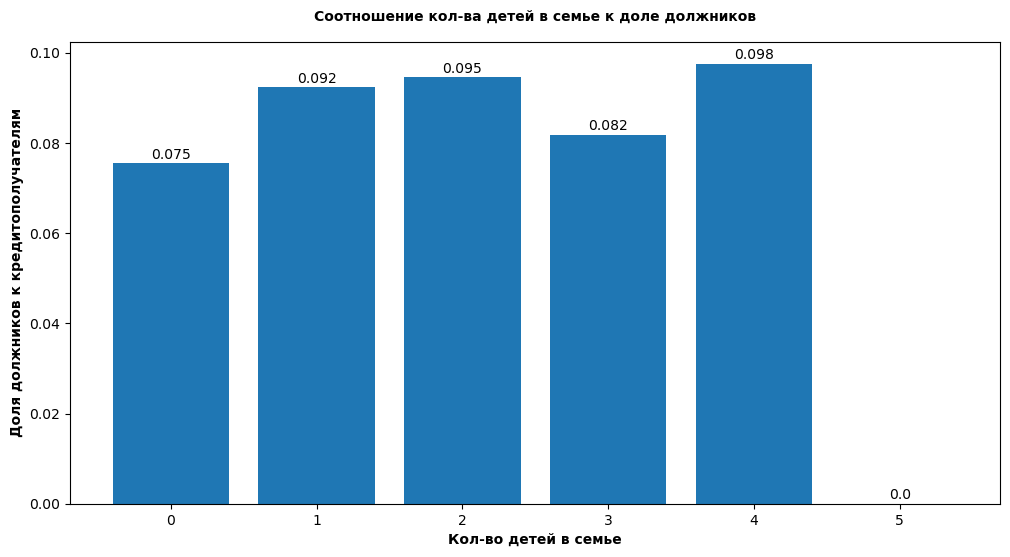

,Кол-во детей,Кол-во кредитополучателей,Кол-во должников,Доля должников
0,0,14091,1063,0.075438
1,1,4808,444,0.092346
2,2,2052,194,0.094542
3,3,330,27,0.081818
4,4,41,4,0.097561
5,5,9,0,0.000000


In [23]:
#общее число должников, сгруппированны по количеству детей
children_debt_sum = data.groupby('children')['debt'].sum()
#общее число людей взявших кредит, сгруппированны по количеству детей
children_debt_count = data.groupby('children')['debt'].count()
#конверсия должников к общему количеству людей взявших кредит
children_debt_conversion = children_debt_sum / children_debt_count
number_of_children = data['children'].sort_values().unique()

#функция для вывода значений конверсии над столбцами на графике
def column_text_style(values):
    for i, v in enumerate(values):
        plt.text(i, v+0.001, str(round(v, 3)), ha = 'center', size = 10)

def show_pivot_table(data, index, columns):
    data_pivot = data.pivot_table(index = index, values = 'debt', aggfunc = ['count', 'sum'])
    data_pivot.columns = data_pivot.columns.map('_'.join).str.strip('_')
    data_pivot['conversion_debt'] = data_pivot['sum_debt'] / data_pivot['count_debt']
    data_pivot = data_pivot.reset_index()
    data_pivot.columns = columns
    display(data_pivot)

    
plt.figure(figsize = (12, 6))
plt.bar(number_of_children, children_debt_conversion)
column_text_style(children_debt_conversion)
plt.xlabel('Кол-во детей в семье', weight = 'bold', size = 10)
plt.ylabel('Доля должников к кредитополучателям', weight = 'bold', size = 10)
plt.title('Соотношение кол-ва детей в семье к доле должников', weight = 'bold', size = 10, pad = 15.0)

plt.show()

show_pivot_table(data, 'children', ['Кол-во детей', 'Кол-во кредитополучателей', 'Кол-во должников', 'Доля должников'])

**Вывод** 

Исходя из данных в сводной таблице, можно заметить, что с ростом количества детей уменьшается количество кредитополучателей. Самыми многочисленными категориями являются: семьи без детей, с 1 и 2 детьми. Если сравнить самые многочисленные категории, то проследим зависимость: чем больше количество детей, тем выше доля должников. Также это можно наглядно увидеть в столбчатой диаграмме.


#### Есть ли зависимость между семейным положением и возвратом кредита в срок?

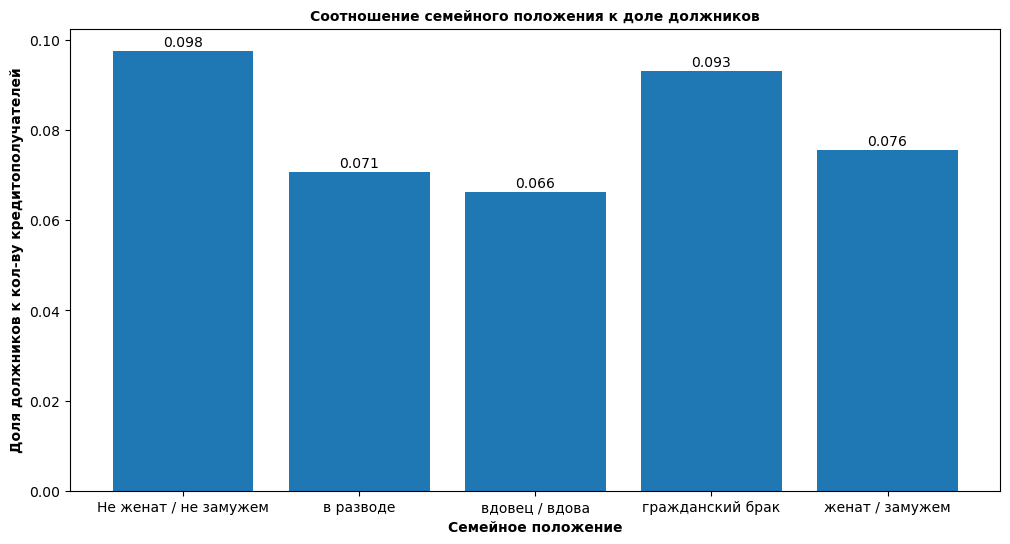

,Семейное положение,Кол-во кредитополучателей,Кол-во должников,Доля должников
0,Не женат / не замужем,2796,273,0.097639
1,в разводе,1189,84,0.070648
2,вдовец / вдова,951,63,0.066246
3,гражданский брак,4134,385,0.093130
4,женат / замужем,12261,927,0.075606


In [24]:
#общее число должников, сгруппированны по семейному положению
family_status_debt_sum = data.groupby('family_status')['debt'].sum()
#общее число людей взявших кредит, сгруппированны по семейному положению
family_status_debt_count = data.groupby('family_status')['debt'].count()
#конверсия должников к общему количеству людей взявших кредит
family_status_debt_conversion = family_status_debt_sum / family_status_debt_count
family_status_name = data['family_status'].sort_values().unique()

plt.figure(figsize = (12, 6))
plt.bar(family_status_name, family_status_debt_conversion)
column_text_style(family_status_debt_conversion)
plt.xlabel('Семейное положение', weight = 'bold', size = 10)
plt.ylabel('Доля должников к кол-ву кредитополучателей', weight = 'bold', size = 10)
plt.title('Соотношение семейного положения к доле должников', weight = 'bold', size = 10)
plt.show()
show_pivot_table(data, 'family_status',\
                 ['Семейное положение', 'Кол-во кредитополучателей', 'Кол-во должников', 'Доля должников'])

**Вывод**

Исходя из данных сводной таблицы и столбчатой диаграммы, можно сделать вывод, что заемщики, которые состоят или состояли в браке ранее, имею более низкую долю должников. Самая же высокая конверсия невыплаченных долгов у клиентов, которые не состояли в браке или находятся в гражданском браке.

#### Есть ли зависимость между уровнем дохода и возвратом кредита в срок?

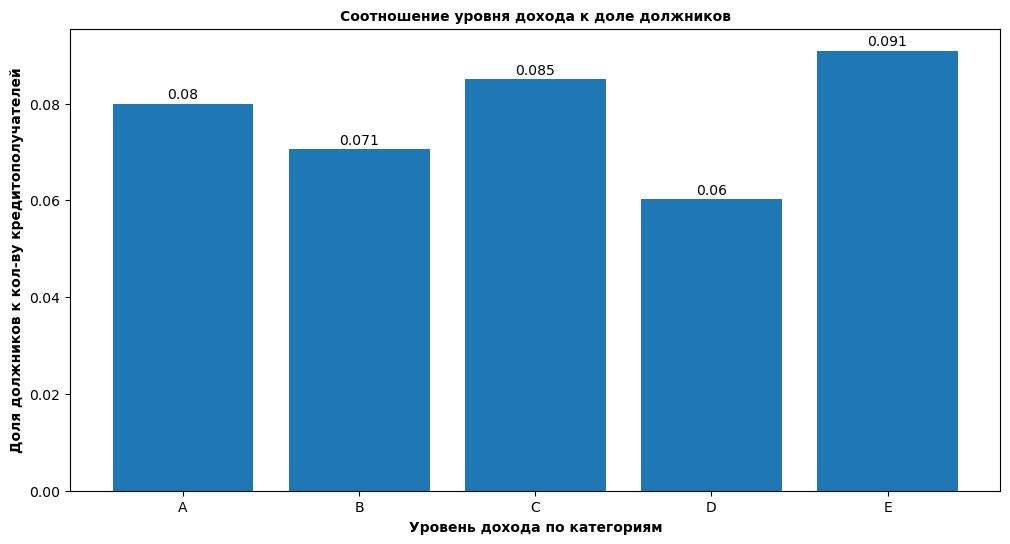

,Уровень дохода по категориям,Кол-во кредитополучателей,Кол-во должников,Доля должников
0,A,25,2,0.080000
1,B,5014,354,0.070602
2,C,15921,1353,0.084982
3,D,349,21,0.060172
4,E,22,2,0.090909


In [25]:
#общее число должников, сгруппированны по уровню дохода
income_debt_sum = data.groupby('total_income_category')['debt'].sum()
#общее число людей взявших кредит, сгруппированны по уровню дохода
income_debt_count = data.groupby('total_income_category')['debt'].count()
#конверсия должников к общему количеству людей взявших кредит
income_debt_conversion = income_debt_sum / income_debt_count
income_category = data['total_income_category'].sort_values().unique()

plt.figure(figsize = (12, 6))
plt.bar(income_category, income_debt_conversion)
column_text_style(income_debt_conversion)
plt.xlabel('Уровень дохода по категориям', weight = 'bold', size = 10)
plt.ylabel('Доля должников к кол-ву кредитополучателей', weight = 'bold', size = 10)
plt.title('Соотношение уровня дохода к доле должников', weight = 'bold', size = 10)
plt.show()
show_pivot_table(data, 'total_income_category',\
                 ['Уровень дохода по категориям', 'Кол-во кредитополучателей', 'Кол-во должников', 'Доля должников'])

**Вывод** 

На основании данных в сводной таблице, можно заметить, что выборка несбалансированная. Количество кредитополучателей из категорий "A", "D", "E" - малочислено, поэтому сравним две самые многочисленные выборки: "B" и "C". При сравнении этих двух категорий, видим, что чем выше доход кредитополучателя, тем реже происходит просрочка выплаты долга. 

#### Как разные цели кредита влияют на его возврат в срок?

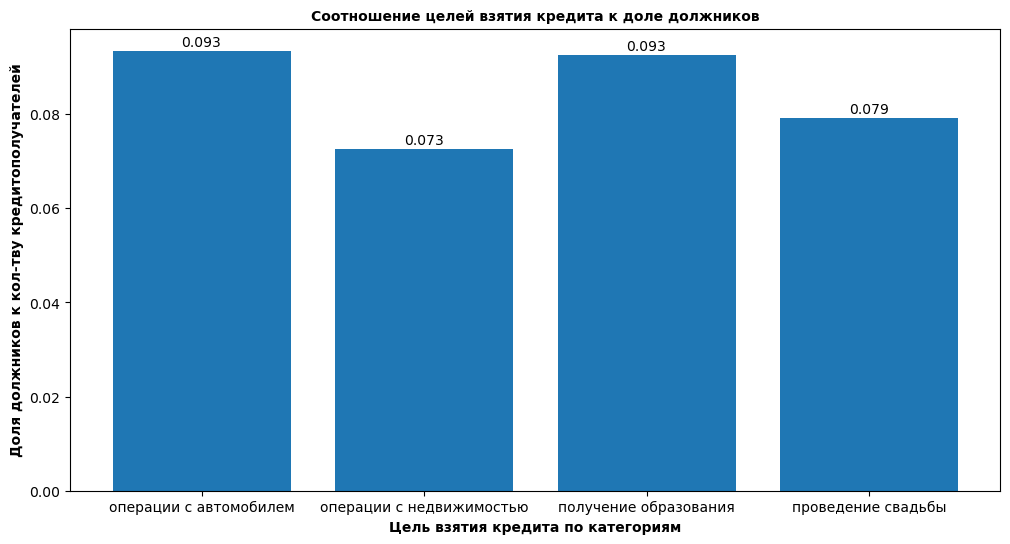

,Цель взятия кредита,Кол-во кредитополучателей,Кол-во должников,Доля должников
0,операции с автомобилем,4279,400,0.093480
1,операции с недвижимостью,10751,780,0.072551
2,получение образования,3988,369,0.092528
3,проведение свадьбы,2313,183,0.079118


In [26]:
#общее число должников, сгруппированны по цели кредита
purpose_debt_sum = data.groupby('purpose_category')['debt'].sum()
#общее число людей взявших кредит, сгруппированны по цели кредита
purpose_debt_count = data.groupby('purpose_category')['debt'].count()
#конверсия должников к общему количеству людей взявших кредит
purpose_debt_conversion = purpose_debt_sum / purpose_debt_count
purpose_category = data['purpose_category'].sort_values().unique()

plt.figure(figsize = (12, 6))
plt.bar(purpose_category, purpose_debt_conversion)
column_text_style(purpose_debt_conversion)
plt.xlabel('Цель взятия кредита по категориям', weight = 'bold', size = 10)
plt.ylabel('Доля должников к кол-тву кредитополучателей', weight = 'bold', size = 10)
plt.title('Соотношение целей взятия кредита к доле должников', weight = 'bold', size = 10)
plt.show()
show_pivot_table(data, 'purpose_category',\
                 ['Цель взятия кредита', 'Кол-во кредитополучателей', 'Кол-во должников', 'Доля должников'])

**Вывод** 

Клиенты, которые берут кредиты на операции с автомобилем и получение образования, имеют наивысшие доли непокрытых кредитов. Категория, имеющая наименьшую долю невыплаченных долгов - "операции с недвижимостью".

#### Приведите возможные причины появления пропусков в исходных данных.

Ответ: В таблице с исходными данными пропуски имеются в двух столбцах: 'days_employed', 'total_income'. При этом количество пропусков в обоих столбцах одинаковое, следовательно, можно сделать вывод, что пропуски неслучайные. Есть вероятность, что пропуски в этих столбцах зависят друг от друга или от значений в самих столбцах. В данном случае причиной пустого поля является то, что кредитополучатель не заполнил оба или одно из данных полей, либо не дал разрешение банку на их обработку.

#### Объясните, почему заполнить пропуски медианным значением — лучшее решение для количественных переменных.

Ответ: Пропуски для количественных переменных лучше заполнять медианными значениями, поскольку они будут характеризовать состояние выборки. Такой способ заполнения пропусков помогает оценить типичные значения выборки. Также медианное значение будет более точно характеризовать данные (при определении среднего значения выборки) нежели среднее арифметическое, в том случае, если в таблице данных есть элементы, которые сильно выделяются из большинства. 

### Общий вывод

В данном проекте было проведено исследование надежности заемщиков. В исходных данных была предоставлена таблица с данными кредитополучателей.

На этапе предобработки данных были найдены столбцы, содержащие пропуски в данных по заемщикам, а именно столбцы количества дней рабочего стажа и общего дохода кредитополучателя. Пропуски в этих столбцах были заменены на медианные значения по категориям кредитополучателей.

Помимо этого в столбце с количеством дней трудового стажа были встречены артефакты, а именно отрицательные значения, которые в последующем заменили на положительные.

В поле, содержащем количество детей, были удалены аномальные значения: отрицательные и аномально большие значения.

Данные в столбце с доходом заемщика были приведены к целочисленому типу.

Была произведена обработка неявных дубликатов в столбце, содержащим информацию об образовании заемщика.

Также в таблицу были добавлены два столбца: с категориями доходов кредитополучателей и с категориями целей взятия кредита.

На этапе обработки и анализа данных были выявлены следующие зависимости:

- чем выше количество детей в семье, тем выше доля должников;
- клиенты, состоящие или ранее состоявшие в браке, реже совершают просрочку платежей, чем люди не состоявшие в браке;
- чем выше доход клиента, тем реже совершается просрочка платежа;
- клиенты, совершающие заем на совершение операций с недвижимостью, имеют наименьшую долю должников.

Исходя из полученных результатов, можно сделать вывод, что на выплату долгов по кредитам влияет семейное положение, количество детей в семье заемщика, его доход и цель взятия кредита. Следовательно, все категории, рассмотренные в данном проекте, влияют на надежность заемщика.